<a href="https://colab.research.google.com/github/alancolinarce/ArchivesUnleashed/blob/main/TopicModeling_SS_PaisesAL_esPDFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Código para importar archivos locales

from google.colab import files
uploaded = files.upload()

Saving TXTs_PaisesAL_es.zip to TXTs_PaisesAL_es.zip


### Instalación de mallet

In [2]:
#Instalé mallet siguiendo este tutorial: https://medium.com/analytics-vidhya/mallet-machine-learning-for-language-toolkit-installation-on-google-colaboratory-80b75fe486cb

import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [4]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
path_to_mallet = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
pip install little_mallet_wrapper

### Importar paquetes y extraer archivos de carpeta zip

In [6]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [8]:
#Tutorial para extraer archivos de una carpeta zip: https://appdividend.com/2022/09/24/python-unzip/

import zipfile
from zipfile import ZipFile
with ZipFile("TXTs_PaisesAL_es.zip", 'r') as zObject:
  zObject.extractall()

In [9]:
directory = "TXTs_PaisesAL_es"

In [10]:
files = glob.glob(f"{directory}/*.txt")
files

['TXTs_PaisesAL_es/416.guatemalaspanish_4.pdf.txt',
 'TXTs_PaisesAL_es/ib_abortion-chile-sp.pdf.txt',
 'TXTs_PaisesAL_es/416.guatemalaspanish_2.pdf.txt',
 'TXTs_PaisesAL_es/politica-de-eduacion-sexual-guatemala.pdf.txt',
 'TXTs_PaisesAL_es/Embarazo-no-deseado-Mexico.pdf.txt',
 'TXTs_PaisesAL_es/fb-aborto-en-colombia_0.pdf.txt',
 'TXTs_PaisesAL_es/ModeloGuatemala-Web.pdf.txt',
 'TXTs_PaisesAL_es/embarazo-no-deseado-colombia_1.pdf.txt',
 'TXTs_PaisesAL_es/Dominican_Women_Spanish.pdf.txt',
 'TXTs_PaisesAL_es/fb_Guatemala.pdf.txt',
 'TXTs_PaisesAL_es/ModeloPanama-Web.pdf.txt',
 'TXTs_PaisesAL_es/rib_Nicaragua2006-09.pdf.txt',
 'TXTs_PaisesAL_es/416peru_spanish_graphics_2.pdf.txt',
 'TXTs_PaisesAL_es/FB-aborto-en-Mexico.pdf.txt',
 'TXTs_PaisesAL_es/rib-guatemala.pdf.txt',
 'TXTs_PaisesAL_es/fb_Nicaragua.pdf.txt',
 'TXTs_PaisesAL_es/IB_Guatemala_2007.pdf.txt',
 'TXTs_PaisesAL_es/FB-DD-Guatemala-SP.pdf.txt',
 'TXTs_PaisesAL_es/416peru_spanish_graphics_3.pdf.txt',
 'TXTs_PaisesAL_es/fb_El_Salv

# Análisis

In [11]:
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

In [12]:
original_texts = []
for file in files:
    text = open(file, encoding='utf-8').read()
    original_texts.append(text)

In [13]:
little_mallet_wrapper.process_string(text, numbers='remove')

'perú educación sexual solo estudiantes encuestados años recibió enseñanza sobre todos los temas que conforman educación sexual integral categorías temas fisiología sexual reproductiva prevención vih/its anticoncepción embarazo planeado valores habilidades interpersonales género derechos sexuales reproductivos tt/esiperu'

In [14]:
pdf_titles = [Path(file).stem for file in files]
pdf_titles

['416.guatemalaspanish_4.pdf',
 'ib_abortion-chile-sp.pdf',
 '416.guatemalaspanish_2.pdf',
 'politica-de-eduacion-sexual-guatemala.pdf',
 'Embarazo-no-deseado-Mexico.pdf',
 'fb-aborto-en-colombia_0.pdf',
 'ModeloGuatemala-Web.pdf',
 'embarazo-no-deseado-colombia_1.pdf',
 'Dominican_Women_Spanish.pdf',
 'fb_Guatemala.pdf',
 'ModeloPanama-Web.pdf',
 'rib_Nicaragua2006-09.pdf',
 '416peru_spanish_graphics_2.pdf',
 'FB-aborto-en-Mexico.pdf',
 'rib-guatemala.pdf',
 'fb_Nicaragua.pdf',
 'IB_Guatemala_2007.pdf',
 'FB-DD-Guatemala-SP.pdf',
 '416peru_spanish_graphics_3.pdf',
 'fb_El_Salvador.pdf',
 'GuatemalaUPIAsp.pdf',
 'politica-de-educacion-sexual-peru-fs_1.pdf',
 '416.guatemalaspanish.pdf',
 'rib_Honduras.pdf',
 'maternidad-segura-mexico_0.pdf',
 '416.guatemalaspanish_3.pdf',
 '2016.2.ElDiarioDeHoyElSalvador.pdf',
 'IB_Honduras_2007.pdf',
 'politica-de-educacion-sexual-guatemala-fs_0.pdf',
 'de-la-normativa-a-la-practica-educacion-sexual-peru.pdf',
 'IB_Nicaragua_2007.pdf',
 'Embarazo-no-de

In [15]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 40
Mean Number of Words per Document: 5010.3
Vocabulary Size: 14120


In [16]:
num_topics = 15

In [17]:
training_data = training_data


In [18]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/meTooTextAnalysis'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [ ]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

In [20]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['aborto', 'chile', 'católicos', 'sobre', 'argentina', 'casos', 'está', 'los', 'opiniones', 'legal', 'favor', 'obispos', 'acuerdo', 'votar', 'derecho', 'vez', 'ley', 'mujer', 'toda', 'argentinos']

✨Topic 1✨

['adolescentes', 'mujeres', 'años', 'maternidad', 'unión', 'entre', 'temprana', 'antes', 'honduras', 'jóvenes', 'hijo', 'nacimientos', 'educación', 'escolaridad', 'cuadro', 'adolescente', 'nicaragua', 'nivel', 'guttmacher', 'tasa']

✨Topic 2✨

['sobre', 'como', 'del', 'entre', 'han', 'http', 'derechos', 'según', 'educación', 'otras', 'sus', 'desde', 'política', 'estudio', 'capacitación', 'sido', 'www', 'total', 'acuerdo', 'centro']

✨Topic 3✨

['mujeres', 'york', 'nueva', 'dominicana', 'república', 'mujer', 'dominicanas', 'violencia', 'new', 'aquí', 'grupos', 'city', 'parenthood', 'eso', 'hay', 'agua', 'planned', 'ciudad', 'como', 'cómo']

✨Topic 4✨

['panamá', 'mbt', 'rvf', 'qbsb', 'efm', 'doméstica', 'mpt', 'regional', 'mecanismos', 'dpo', 'cooperación', 'locales', 'u

In [21]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [22]:
pdf_to_check = 'Adolescentes-Mexico.pdf'

pdf_number = pdf_titles.index(pdf_to_check)

print(f"Topic Distributions for {pdf_titles[pdf_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[pdf_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for Adolescentes-Mexico.pdf

✨Topic 0 ['aborto', 'chile', 'católicos', 'sobre', 'argentina', 'casos'] ✨
Probability: 0.0

✨Topic 1 ['adolescentes', 'mujeres', 'años', 'maternidad', 'unión', 'entre'] ✨
Probability: 0.036

✨Topic 2 ['sobre', 'como', 'del', 'entre', 'han', 'http'] ✨
Probability: 0.077

✨Topic 3 ['mujeres', 'york', 'nueva', 'dominicana', 'república', 'mujer'] ✨
Probability: 0.0

✨Topic 4 ['panamá', 'mbt', 'rvf', 'qbsb', 'efm', 'doméstica'] ✨
Probability: 0.0

✨Topic 5 ['salud', 'materna', 'mortalidad', 'atención', 'región', 'muertes'] ✨
Probability: 0.037

✨Topic 6 ['los', 'estudiantes', 'profesores', 'educación', 'para', 'sexual'] ✨
Probability: 0.012

✨Topic 7 ['perú', 'esi', 'ucayali', 'sexual', 'lima', 'ayacucho'] ✨
Probability: 0.0

✨Topic 8 ['guatemala', 'indígenas', 'inseguro', 'mspas', 'guatemaltecas', 'indígena'] ✨
Probability: 0.0

✨Topic 9 ['méxico', 'región', 'federal', 'edad', 'estados', 'servicios'] ✨
Probability: 0.349

✨Topic 10 ['vih', 

In [23]:
import random
target_labels = random.sample(pdf_titles, 10)

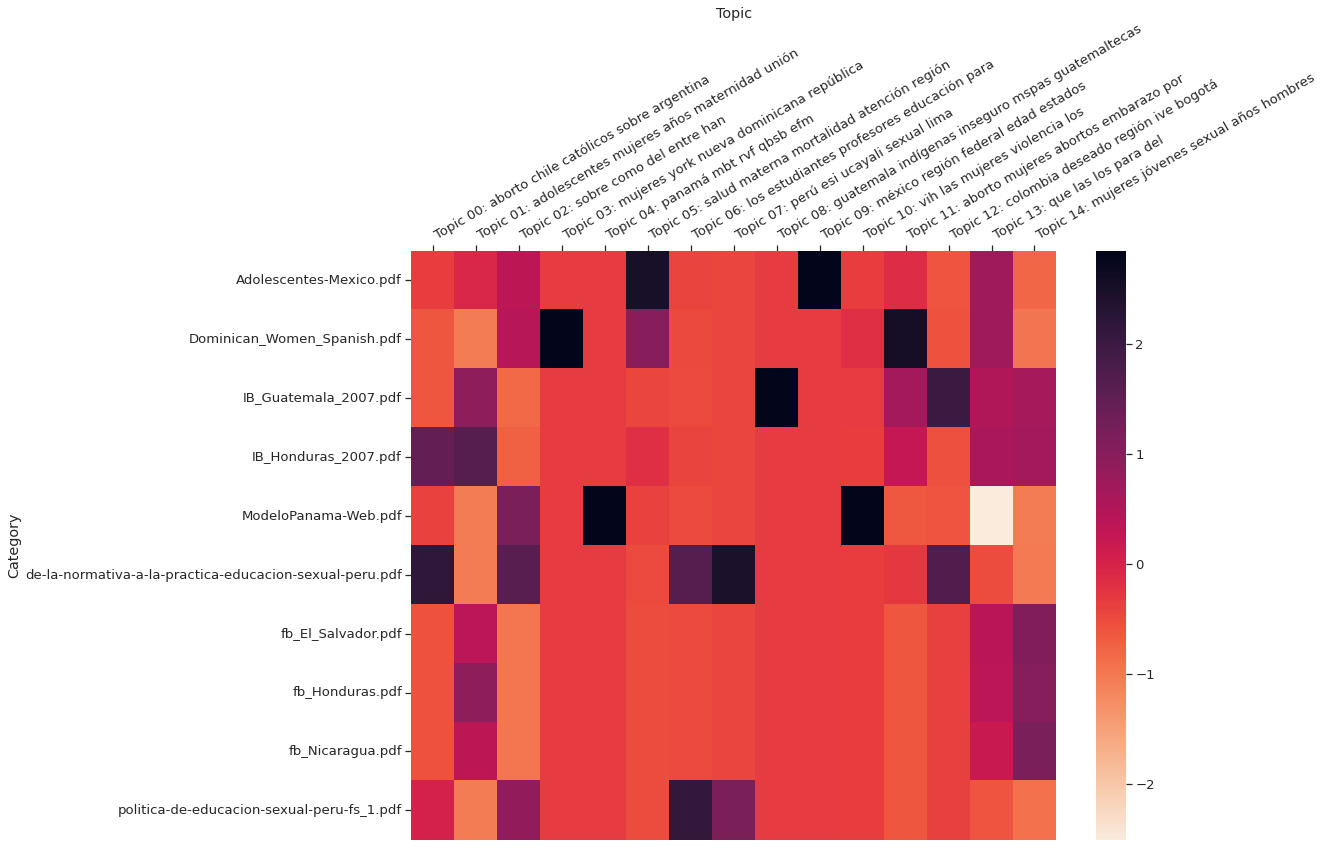

In [29]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(pdf_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (18, 12)
                                     )

In [25]:
training_data_pdf_titles = dict(zip(training_data, pdf_titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [26]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_pdf_titles[document] + "\n")
    return

In [27]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5)


✨Topic 0✨

['aborto', 'chile', 'católicos', 'sobre', 'argentina', 'casos', 'está', 'los', 'opiniones', 'legal', 'favor', 'obispos', 'acuerdo', 'votar', 'derecho', 'vez', 'ley', 'mujer', 'toda', 'argentinos']

0.597 EncuestaenArgentina-ESPANOL.pdf

0.28 2016.2.ElDiarioDeHoyElSalvador.pdf

0.198 ib_abortion-chile-sp.pdf

0.0256 Mujeres_y_CC_-_Colombia.pdf

0.0075 GuatemalaUPIAsp.pdf



In [28]:
display_top_titles_per_topic(topic_number=2, number_of_documents=5)

✨Topic 2✨

['sobre', 'como', 'del', 'entre', 'han', 'http', 'derechos', 'según', 'educación', 'otras', 'sus', 'desde', 'política', 'estudio', 'capacitación', 'sido', 'www', 'total', 'acuerdo', 'centro']

0.2341 416peru_spanish_graphics_3.pdf

0.1726 416.guatemalaspanish_2.pdf

0.1626 politica-de-eduacion-sexual-guatemala.pdf

0.16 ModeloGuatemala-Web.pdf

0.1515 de-la-normativa-a-la-practica-educacion-sexual-peru.pdf

